# Masters dissertation project: Gary Lynch (Part 1)

This Python notebook details the data processing and analysis completed as part of the MSC in Social Data Analytics at UCD. The author of this document is Gary Lynch - if you have any questions related to the analysis detailed below, you can reach me via email at gary.lynch1@ucdconnect.ie.

This project involved taking tweet data exported through the Meltwater platform and transforming it for research purposes. Two datasets are used, one including pro-Brexit tweets and another containing anti-Brexit tweets.

The first section (Data import and preparation) of this document adresses the data import and initial data checks undertaken at the beginning of this project. The second section (Network analysis) details the steps taken to complete the network analysis portion of the research. The third section (Media usage) outlines how the t.co links from the tweet data were transformed into full URLs for use in this project.

## Data import and preparation

The tweet data used for this project is stored across multiple CSV files. The first step is to import these into Python and merge them into a single file. This is performed for both datasets, which are saved as antibrexit_data and probrexit_data.

In [1]:
#Load necessary libraries
import csv 
import glob
import pandas as pd

#Set the path to where the tweet datasets are
path =r'C:/Users/Gary/Documents/Anti Brexit'
allFiles = glob.glob(path + "/*.csv")
stockstats_data = pd.DataFrame()
list_ = []

#Run through all the csv files and import to a single dataframe.
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None,encoding='utf-16', sep='\t')
    list_.append(df)
    antibrexit_data = pd.concat(list_)
    print(file_ + " has been imported.")

C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 02 28 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 04 22 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 05 37 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 07 10 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 08 19 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 09 14 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 10 22 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 12 18 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 13 32 PM.csv has been imported.
C:/Users/Gary/Documents/Anti Brexit\Brexit_research - May 28, 2022 - 3 58

In [2]:
#Same process as above, for the pro-Brexit datase
path =r'C:/Users/Gary/Documents/Pro Brexit'
allFiles = glob.glob(path + "/*.csv")
stockstats_data = pd.DataFrame()
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None,encoding='utf-16', sep='\t')
    list_.append(df)
    probrexit_data = pd.concat(list_)
    print(file_ + " has been imported.")

C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 23 16 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 25 03 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 26 48 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 28 09 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 29 59 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 31 28 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 33 02 PM.csv has been imported.
C:/Users/Gary/Documents/Pro Brexit\Brexit_research - May 28, 2022 - 2 35 37 PM.csv has been imported.


Now that these datasets are merged, I export the data to check that all the data has correctly merged. I do this by first opening the datasets, to ensure it has the correct number of columns and rows. 

I then export the full datasets back to CSV files, as well as exporting just a single column of data to CSV. These can be opened outside of excel to double check the data is correctly formatted. 

In [8]:
antibrexit_data

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,09-Jan-2022 11:58PM,NaN,https://twitter.com/nickynicky77551/statuses/1...,NaN,"RT @cnapan: #JohnsonOut is now running at 218,...",Twitter,@nickynicky77551,Unknown,NaN,English,...,nicky@nicky7755,https://twitter.com/nickynicky77551,"Ardent Remainer; Rejoiner now, Support NHS 💙 #...",1697.0,2576.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
1,09-Jan-2022 11:58PM,NaN,https://twitter.com/lines12345/statuses/148032...,NaN,RT @Femi_Sorry: My point: Any Labour leader wh...,Twitter,@lines12345,Unknown,NaN,English,...,Helen,https://twitter.com/lines12345,Tory hating Remainer,11.0,92.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
2,09-Jan-2022 11:58PM,NaN,https://twitter.com/millymoo97/statuses/148032...,NaN,RT @andy_murray: QT @Nigel_Farage: Please reco...,Twitter,@millymoo97,Unknown,NaN,English,...,seonaid mcgill,https://twitter.com/millymoo97,"Scottish, European, anti-Brexit, pro-EU, freel...",2129.0,3880.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
3,09-Jan-2022 11:58PM,NaN,https://twitter.com/ValueSurplus/statuses/1480...,NaN,RT @mikegalsworthy: We’re the first country in...,Twitter,@valuesurplus,United Kingdom,NaN,English,...,Rightwing politics is a social virus #BLM 🇵🇸🌈,https://twitter.com/ValueSurplus,Classical Cultural Marxist.\nAnti Brexit estab...,2420.0,4952.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
4,09-Jan-2022 11:57PM,NaN,https://twitter.com/Jackcdawes/statuses/148032...,NaN,"RT @StevePeers: QT @andy_murray: Game, set and...",Twitter,@jackcdawes,United Kingdom,NaN,English,...,Jack Dawes #FBPEGlobal #JohnsonOut #RejoinEU,https://twitter.com/Jackcdawes,"Lover of crime & horror fiction, history, & Me...",18304.0,19889.0,"Jan 9, 2022",11:57 PM,England,London,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,27-Mar-2022 12:04AM,NaN,http://twitter.com/LauraPh27961838/statuses/15...,NaN,RT @PrfChrisPainter: Johnson delayed and dithe...,Twitter,@LauraPh27961838,Unknown,NaN,English,...,Laura Phelan,http://www.twitter.com/LauraPh27961838,Languages Literature Europe Remainer.🕷Pic of 6...,6011.0,6178.0,"Mar 27, 2022",12:04 AM,NaN,NaN,NaN
7815,27-Mar-2022 12:04AM,NaN,http://twitter.com/carolinep0/statuses/1507871...,NaN,"RT @j_b_kennedy: Bizarrely because of #Brexit,...",Twitter,@carolinep0,United Kingdom,NaN,English,...,Caroline P. 🇪🇺🔶 💙 What is today's fresh hell?,http://www.twitter.com/carolinep0,🇪🇺 #FBPE #FBPPR Remainer for ever. Engaged cit...,2753.0,2337.0,"Mar 27, 2022",12:04 AM,England,Milton Keynes,NaN
7816,27-Mar-2022 12:03AM,NaN,https://twitter.com/carolinep0/statuses/150787...,NaN,RT @Sillyshib: Brexit was supposed to split th...,Twitter,@carolinep0,United Kingdom,NaN,English,...,Caroline P. 🇪🇺🔶 💙 What is today's fresh hell?,https://twitter.com/carolinep0,🇪🇺 #FBPE #FBPPR Remainer for ever. Engaged cit...,2753.0,2337.0,"Mar 27, 2022",12:03 AM,England,Milton Keynes,NaN
7817,27-Mar-2022 12:01AM,NaN,http://twitter.com/PeteGardner18/statuses/1507...,NaN,@mitsyarty #Brexit going well in terms of UK i...,Twitter,@PeteGardner18,United Kingdom,NaN,English,...,Pete Gardner,http://www.twitter.com/PeteGardner18,"#FBPE #FBPPR Centrist Fantasist, #Remainer, an...",1380.0,2298.0,"Mar 27, 2022",12:01 AM,England,London,NaN


In [9]:
probrexit_data

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,15-Jan-2022 11:58PM,NaN,https://twitter.com/dianemcgregor8/statuses/14...,NaN,RT @re11ddy: QT @sandieshoes: Do this if you v...,Twitter,@dianemcgregor8,Cameroon,NaN,English,...,Diane M McGregor,https://twitter.com/dianemcgregor8,Veggie burger! Lover of all Animals and Nature...,122.0,185.0,"Jan 15, 2022",11:58 PM,North,NaN,NaN
1,15-Jan-2022 11:57PM,NaN,http://twitter.com/DeniseMembery/statuses/1482...,NaN,RT @RickSacrop: Michael Fabricant is absolutel...,Twitter,@DeniseMembery,United Kingdom,NaN,English,...,Denise M.,http://www.twitter.com/DeniseMembery,"🇬🇧✡️ Proud to be British. 🇬🇧 Animal lover, m...",5721.0,6291.0,"Jan 15, 2022",11:57 PM,England,NaN,NaN
2,15-Jan-2022 11:56PM,NaN,https://twitter.com/007Stirling/statuses/14825...,NaN,@StokieDrew2 I do find it rich; that Tory vote...,Twitter,@007stirling,United Kingdom,NaN,English,...,Finlay Stirling 🇬🇧☘️❤️🏴󠁧󠁢󠁳󠁣󠁴󠁿,https://twitter.com/007Stirling,BRITISH/IRISH/ULSTER-SCOTS PUL\nRIGHT-WING. \n...,7219.0,7433.0,"Jan 15, 2022",11:56 PM,Northern Ireland,Belfast,NaN
3,15-Jan-2022 11:54PM,NaN,https://twitter.com/UKleadstheworld/statuses/1...,NaN,RT @denistmurray: Brexit Britain win as London...,Twitter,@ukleadstheworld,United Kingdom,NaN,English,...,BestofBritish,https://twitter.com/UKleadstheworld,"GB News, Conservatives, Brexiteer, Block all ads.",700.0,1014.0,"Jan 15, 2022",11:54 PM,NaN,NaN,NaN
4,15-Jan-2022 11:53PM,NaN,https://twitter.com/paul_beamish/statuses/1482...,NaN,@afneil If Johnson is taken down by The Tories...,Twitter,@paul_beamish,United Kingdom,NaN,English,...,Paul Beamish,https://twitter.com/paul_beamish,Brexiteer and Shipbuilder (Plater/Welder) livi...,200.0,822.0,"Jan 15, 2022",11:53 PM,England,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,20-Mar-2022 12:01AM,NaN,http://twitter.com/Brexiteer1234/statuses/1505...,NaN,@JamesRobvincent @7nestingwrens He was also fi...,Twitter,@Brexiteer1234,United Kingdom,NaN,English,...,Wendy🇬🇧,http://www.twitter.com/Brexiteer1234,Conservative/Brexiteer. Boris is not perfect b...,813.0,892.0,"Mar 20, 2022",12:01 AM,England,Lichfield,NaN
16132,20-Mar-2022 12:00AM,NaN,https://twitter.com/Georgin40427121/statuses/1...,NaN,RT @sandieshoes: Boris is being heavily critic...,Twitter,@georgin40427121,United States,NaN,English,...,Georgina,https://twitter.com/Georgin40427121,"http://Brexiteer.support Boris,Love our countr...",662.0,228.0,"Mar 20, 2022",12:00 AM,Pennsylvania,Bristol,NaN
16133,20-Mar-2022 12:00AM,NaN,https://twitter.com/sandieshoes/statuses/15053...,NaN,Ludicrous to suggest Boris is insulting Ukrain...,Twitter,@sandieshoes,Unknown,NaN,English,...,sandieshoes 🇬🇧🇺🇸,https://twitter.com/sandieshoes,Brexiteer🇬🇧Animal lover. Where did that opini...,23594.0,23015.0,"Mar 20, 2022",12:00 AM,NaN,NaN,NaN
16134,20-Mar-2022 12:00AM,NaN,http://twitter.com/Sunpoches/statuses/15053333...,NaN,RT @DannyInvictus: @timfarron @ThomasEvansAdur...,Twitter,@Sunpoches,United Kingdom,NaN,English,...,Free at Last,http://www.twitter.com/Sunpoches,52% Pro Brexit: 48% Anti EU #ManagedNoDeal - W...,4589.0,5035.0,"Mar 20, 2022",12:00 AM,England,London,NaN


In [4]:
#Exporting the datasets to  csv files
probrexit_data.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/TweetDataset_ProBrexit_Jan-Mar2022.csv')
antibrexit_data.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/TweetDataset_AntiBrexit_Jan-Mar2022.csv')

#Exporting single columns for the datasets to csv files
anti_text = antibrexit_data["Hit Sentence"]
anti_text.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/AntiBrexit_JustTweetText.csv')

pro_text = probrexit_data["Hit Sentence"]
pro_text.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/ProBrexit_JustTweetText.csv')

The next check is to ensure that all the dates in our dataset have been imported. We can do this by visualizing the daily number of tweets. However, we will need to reformat the "Alternate Date Format" column so that Python recognises it as a date.

In [12]:
#Create grouped dataframes on the "Alternate Date Format" column and create a date column for each dataset
pro_daily_data = probrexit_data.groupby(["Alternate Date Format"]).size()
pro_daily_data1 = pro_daily_data.to_frame()
pro_daily_data1['Date'] = pro_daily_data1.index
pro_daily_data1['Date'] =   pd.to_datetime(pro_daily_data1['Date'], format='%b %d, %Y')
pro_daily_data1 = pro_daily_data1.sort_values(by="Date")

anti_daily_data = antibrexit_data.groupby(["Alternate Date Format"]).size()
anti_daily_data1 = anti_daily_data.to_frame()
anti_daily_data1['Date'] = anti_daily_data1.index
anti_daily_data1['Date'] =   pd.to_datetime(anti_daily_data1['Date'], format='%b %d, %Y')
anti_daily_data1 = anti_daily_data1.sort_values(by="Date")


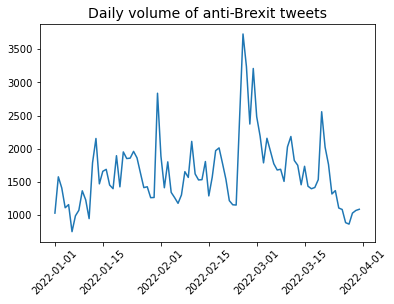

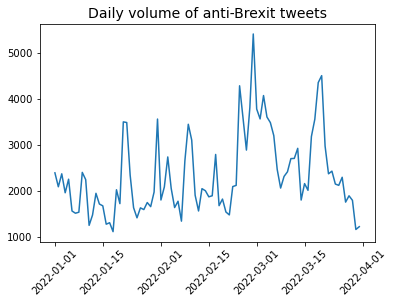

In [14]:
#Import the matplotlib library and use this to plot a time series visualisation for each dataset.
import matplotlib.pyplot as plt

plt.plot(pro_daily_data1['Date'],pro_daily_data1[0])
plt.title('Daily volume of anti-Brexit tweets', fontsize=14)
plt.xticks(rotation=45)
plt.show()

plt.plot(anti_daily_data1['Date'],anti_daily_data1[0])
plt.title('Daily volume of anti-Brexit tweets', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Before we do our analysis, we need some initial descriptions of our dataset. To start, we want to be able to break the tweets into retweets, quote tweets and original tweets. The following code gives us numbers for the number of retweets and quote tweets in each dataset (original tweets are found by taking these numbers away from the total number of tweets in the dataset.

In [15]:
import numpy as np
import regex as re

#The below code isolates tweets in the anti-Brexit dataset that start with "RT @" - an indicator that the tweet is a retweet. These are then counted to give a retweet figure
antibrexit_RT = antibrexit_data["Hit Sentence"].str.findall('RT @')
antibrexit_RT = antibrexit_RT.to_frame()
antibrexit_RT["Hit Sentence"] = antibrexit_RT["Hit Sentence"].astype(str)
antibrexit_RT["Hit Sentence"] = antibrexit_RT["Hit Sentence"].replace('[]', np.nan)
(antibrexit_RT["Hit Sentence"]).count()

161650

In [22]:
#Same as above, but for quote tweets
antibrexit_QT = antibrexit_data["Hit Sentence"].str.findall('QT @')
antibrexit_QT = antibrexit_QT.to_frame()
antibrexit_QT["Hit Sentence"] = antibrexit_QT["Hit Sentence"].astype(str)
antibrexit_QT["Hit Sentence"] = antibrexit_QT["Hit Sentence"].replace('[]', np.nan)
(antibrexit_QT["Hit Sentence"]).count()

29226

In [16]:
#Finding the retweets figure for the pro-Brexit dataset
probrexit_RT = probrexit_data["Hit Sentence"].str.findall('RT @')
probrexit_RT = probrexit_RT.to_frame()
probrexit_RT["Hit Sentence"] = probrexit_RT["Hit Sentence"].astype(str)
probrexit_RT["Hit Sentence"] = probrexit_RT["Hit Sentence"].replace('[]', np.nan)
(probrexit_RT["Hit Sentence"]).count()

93901

In [23]:
#Same as above, but for quote tweets
probrexit_QT = probrexit_data["Hit Sentence"].str.findall('QT @')
probrexit_QT = probrexit_QT.to_frame()
probrexit_QT["Hit Sentence"] = probrexit_QT["Hit Sentence"].astype(str)
probrexit_QT["Hit Sentence"] = probrexit_QT["Hit Sentence"].replace('[]', np.nan)
(probrexit_QT["Hit Sentence"]).count()

22451

## Network analysis

The first thing we need for the network analysis is to isolate the unique accounts in our dataset. To do this, we isolate the account names in the "Influencer" column.

In [27]:
#Drop duplicate accounts from our Influncer column to give us the number of unique pro-Brexit accounts. 
probrexit_data_unqiue = probrexit_data.drop_duplicates(subset=['Influencer'])
probrexit_data_unqiue

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,15-Jan-2022 11:58PM,NaN,https://twitter.com/dianemcgregor8/statuses/14...,NaN,RT @re11ddy: QT @sandieshoes: Do this if you v...,Twitter,@dianemcgregor8,Cameroon,NaN,English,...,Diane M McGregor,https://twitter.com/dianemcgregor8,Veggie burger! Lover of all Animals and Nature...,122.0,185.0,"Jan 15, 2022",11:58 PM,North,NaN,NaN
1,15-Jan-2022 11:57PM,NaN,http://twitter.com/DeniseMembery/statuses/1482...,NaN,RT @RickSacrop: Michael Fabricant is absolutel...,Twitter,@DeniseMembery,United Kingdom,NaN,English,...,Denise M.,http://www.twitter.com/DeniseMembery,"🇬🇧✡️ Proud to be British. 🇬🇧 Animal lover, m...",5721.0,6291.0,"Jan 15, 2022",11:57 PM,England,NaN,NaN
2,15-Jan-2022 11:56PM,NaN,https://twitter.com/007Stirling/statuses/14825...,NaN,@StokieDrew2 I do find it rich; that Tory vote...,Twitter,@007stirling,United Kingdom,NaN,English,...,Finlay Stirling 🇬🇧☘️❤️🏴󠁧󠁢󠁳󠁣󠁴󠁿,https://twitter.com/007Stirling,BRITISH/IRISH/ULSTER-SCOTS PUL\nRIGHT-WING. \n...,7219.0,7433.0,"Jan 15, 2022",11:56 PM,Northern Ireland,Belfast,NaN
3,15-Jan-2022 11:54PM,NaN,https://twitter.com/UKleadstheworld/statuses/1...,NaN,RT @denistmurray: Brexit Britain win as London...,Twitter,@ukleadstheworld,United Kingdom,NaN,English,...,BestofBritish,https://twitter.com/UKleadstheworld,"GB News, Conservatives, Brexiteer, Block all ads.",700.0,1014.0,"Jan 15, 2022",11:54 PM,NaN,NaN,NaN
4,15-Jan-2022 11:53PM,NaN,https://twitter.com/paul_beamish/statuses/1482...,NaN,@afneil If Johnson is taken down by The Tories...,Twitter,@paul_beamish,United Kingdom,NaN,English,...,Paul Beamish,https://twitter.com/paul_beamish,Brexiteer and Shipbuilder (Plater/Welder) livi...,200.0,822.0,"Jan 15, 2022",11:53 PM,England,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14374,20-Mar-2022 05:12PM,NaN,http://twitter.com/Tracie57k/statuses/15055932...,NaN,RT @AgrippaSPQR: @sandieshoes @SusanBanbury1 T...,Twitter,@Tracie57k,United Kingdom,NaN,English,...,Tracie who knows?,http://www.twitter.com/Tracie57k,"Love animals, especially dogs and horses. Prou...",665.0,865.0,"Mar 20, 2022",5:12 PM,England,Derby,NaN
14412,20-Mar-2022 04:51PM,NaN,https://twitter.com/ben_stuteley/statuses/1505...,NaN,RT @PaulEmbery: “Don’t dare compare Brexit to ...,Twitter,@ben_stuteley,United Kingdom,NaN,English,...,Ben Stuteley,https://twitter.com/ben_stuteley,The Arsenal. Love my Country. Love Cornwall Pa...,320.0,971.0,"Mar 20, 2022",4:51 PM,England,St Austell,NaN
14677,20-Mar-2022 02:15PM,NaN,http://twitter.com/HandymanGR/statuses/1505548...,NaN,"@Ye_Olde_Holborn Yes, just been to Morrisons f...",Twitter,@HandymanGR,United Kingdom,NaN,English,...,Gavin John,http://www.twitter.com/HandymanGR,White British Male Tory Brexiteer.\nPronouns: ...,67.0,97.0,"Mar 20, 2022",2:15 PM,England,Wolverhampton,NaN
15534,20-Mar-2022 09:27AM,NaN,https://twitter.com/MaryHerdman/statuses/15054...,NaN,RT @IsabelOakeshott: Boris comparing the fight...,Twitter,@maryherdman,United Kingdom,NaN,English,...,Mary Herdman,https://twitter.com/MaryHerdman,Brexiteer. Political grandmother and animal l...,719.0,461.0,"Mar 20, 2022",9:27 AM,England,Peterborough,NaN


In [28]:
#Drop duplicate accounts from our Influncer column to give us the number of unique anti-Brexit accounts. 
antibrexit_data_unqiue = antibrexit_data.drop_duplicates(subset=['Influencer'])
antibrexit_data_unqiue

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,09-Jan-2022 11:58PM,NaN,https://twitter.com/nickynicky77551/statuses/1...,NaN,"RT @cnapan: #JohnsonOut is now running at 218,...",Twitter,@nickynicky77551,Unknown,NaN,English,...,nicky@nicky7755,https://twitter.com/nickynicky77551,"Ardent Remainer; Rejoiner now, Support NHS 💙 #...",1697.0,2576.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
1,09-Jan-2022 11:58PM,NaN,https://twitter.com/lines12345/statuses/148032...,NaN,RT @Femi_Sorry: My point: Any Labour leader wh...,Twitter,@lines12345,Unknown,NaN,English,...,Helen,https://twitter.com/lines12345,Tory hating Remainer,11.0,92.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
2,09-Jan-2022 11:58PM,NaN,https://twitter.com/millymoo97/statuses/148032...,NaN,RT @andy_murray: QT @Nigel_Farage: Please reco...,Twitter,@millymoo97,Unknown,NaN,English,...,seonaid mcgill,https://twitter.com/millymoo97,"Scottish, European, anti-Brexit, pro-EU, freel...",2129.0,3880.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
3,09-Jan-2022 11:58PM,NaN,https://twitter.com/ValueSurplus/statuses/1480...,NaN,RT @mikegalsworthy: We’re the first country in...,Twitter,@valuesurplus,United Kingdom,NaN,English,...,Rightwing politics is a social virus #BLM 🇵🇸🌈,https://twitter.com/ValueSurplus,Classical Cultural Marxist.\nAnti Brexit estab...,2420.0,4952.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
4,09-Jan-2022 11:57PM,NaN,https://twitter.com/Jackcdawes/statuses/148032...,NaN,"RT @StevePeers: QT @andy_murray: Game, set and...",Twitter,@jackcdawes,United Kingdom,NaN,English,...,Jack Dawes #FBPEGlobal #JohnsonOut #RejoinEU,https://twitter.com/Jackcdawes,"Lover of crime & horror fiction, history, & Me...",18304.0,19889.0,"Jan 9, 2022",11:57 PM,England,London,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,28-Mar-2022 10:34AM,NaN,https://twitter.com/SleepMum/statuses/15083769...,NaN,RT @eyejosh: Putin paid May and Johnson for th...,Twitter,@sleepmum,Unknown,NaN,English,...,SleepDeprivedMum,https://twitter.com/SleepMum,"FTM, POC, anti-racist, remainer and proud, fem...",29.0,239.0,"Mar 28, 2022",10:34 AM,NaN,NaN,NaN
5679,28-Mar-2022 09:02AM,NaN,http://twitter.com/ggrant_grant/statuses/15083...,NaN,@GMB Answers they can’t give- we’re tories and...,Twitter,@ggrant_grant,United Kingdom,NaN,English,...,Greg Grant,http://www.twitter.com/ggrant_grant,Socialist. Woke. Remainer.,9.0,93.0,"Mar 28, 2022",9:02 AM,England,Alsager,NaN
6989,27-Mar-2022 12:42PM,NaN,http://twitter.com/MrsEmmaB12/statuses/1508046...,NaN,"RT @lynnfergy: In the late 1930s-1940s, Michae...",Twitter,@MrsEmmaB12,United States,NaN,English,...,Emma B,http://www.twitter.com/MrsEmmaB12,"Beach cleaner, music lover, sun worshiper, str...",240.0,528.0,"Mar 27, 2022",12:42 PM,Maryland,Essex,NaN
7005,27-Mar-2022 12:34PM,NaN,http://twitter.com/AnneHounam/statuses/1508044...,NaN,We must take a stand against Putin’s invasion ...,Twitter,@AnneHounam,Unknown,NaN,English,...,Anne Hounam,http://www.twitter.com/AnneHounam,"European Scot (Edinburgh) feminist, socialist,...",43.0,85.0,"Mar 27, 2022",12:34 PM,NaN,NaN,NaN


Before we do analysis on the unique accounts, we can check the distribution of follower counts for these Twitter accounts. These distributions are included in the text of the dissertation project.

In [30]:
#The below code was used to check the distribution of follower counts of the unique pro-Brexit accounts (table of results available in the dissertation text)
probrexit_data_unqiue[probrexit_data_unqiue['Twitter Followers'] > 50000]['Influencer'].count()

2

In [31]:
#The below code was used to check the distribution of follower counts of the unique anti-Brexit accounts (table of results available in the dissertation text)
antibrexit_data_unqiue[antibrexit_data_unqiue['Twitter Followers'] > 50000]['Influencer'].count()

6

In [33]:
#Print the highest and lowest Follower count for the pro-Brexit dataset
x = probrexit_data_unqiue['Twitter Followers'].max()

y = probrexit_data_unqiue['Twitter Followers'].min()

print(x)
print(y)

169755.0
1.0


In [34]:
#Print the highest and lowest Follower count for the anti-Brexit dataset
x = antibrexit_data_unqiue['Twitter Followers'].max()

y = antibrexit_data_unqiue['Twitter Followers'].min()

print(x)
print(y)

1147326.0
1.0


The next step is to isolate the tagged mentions from the tweet text data. This will be checked against our unique accounts to find same group and opposite group interactions. 

The following code snippet shows how this was originally done. This was used to give counts for how frequently tweets tagged accounts, by counting the number of @username appearances in tweets.

This method was adapted so that the output was a list, that could be checked against.

In [37]:
#Isolate all of the "@accountname" mentions that appear in the tweet text of the anti-Brexti dataset.
textdata = antibrexit_data['Hit Sentence'].astype(str)

antihandlementions = []

for i in textdata:
    x = re.findall(r"\B@\w+", i)
    antihandlementions.append(x)

In [39]:
#Isolate all of the "@accountname" mentions that appear in the tweet text of the pro-Brexti dataset.
textdata = probrexit_data['Hit Sentence'].astype(str)

prohandlementions = []

for i in textdata:
    x = re.findall(r"\B@\w+", i)
    prohandlementions.append(x)

In [41]:
#Count the number of accounts tagged in each tweet in the pro-Brexit dataset
prohandlecount = []

for i in prohandlementions:
    q = len(i)
    prohandlecount.append(q)

In [42]:
#Count the number of accounts tagged in each tweet in the anti-Brexit dataset
antihandlecount = []

for i in antihandlementions:
    q = len(i)
    antihandlecount.append(q)

Now that we have the counts for each tweet on how many accounts it tags, we can use this to inform our understanding of the tagging behaviour across both datasets. The analysis below tells us how many tweets had 1 tag, 2 tags etc. for each dataset.

The visualizations below show the distribution of number of tags for both datasets.

<BarContainer object of 64 artists>

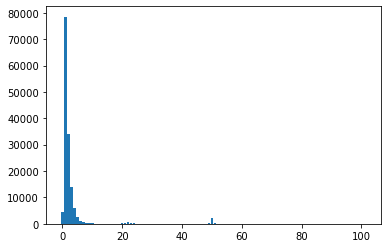

In [51]:
#Count the number of tags per tweet in the pro-Brexit dataset and graph the results.
from collections import Counter
v = Counter(prohandlecount)

plt.bar(v.keys(), v.values())

<BarContainer object of 47 artists>

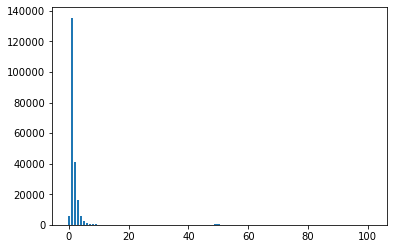

In [52]:
#Count the number of tags per tweet in the anti-Brexit dataset and graph the results.
w = Counter(antihandlecount)

plt.bar(w.keys(), w.values())

In [54]:
#Create percentage values for the number of tweets in the pro-Brexit dataset with each number of tags (e.g. approx. 22.9% of tweets tag two accounts)
c = Counter(prohandlecount)
[(i, c[i] / len(prohandlecount) * 100.0) for i in c]

[(2, 22.966043717105485),
 (1, 53.17040458982192),
 (3, 9.443816000704459),
 (50, 1.4888471933401521),
 (26, 0.0460607866911421),
 (0, 3.0447534731865256),
 (28, 0.010837832162621672),
 (5, 1.656156227350624),
 (4, 3.979516497212645),
 (42, 0.03657768354884814),
 (36, 0.06367226395540232),
 (49, 0.23436812051669367),
 (7, 0.40506397707798497),
 (21, 0.1876299693153877),
 (14, 0.04877024473179752),
 (6, 0.7044590905704087),
 (35, 0.03522295452852043),
 (37, 0.038609777079339706),
 (22, 0.35155218077504047),
 (41, 0.027771944916718035),
 (38, 0.032513496487865015),
 (17, 0.041996599630158976),
 (52, 0.005418916081310836),
 (40, 0.029126673937045742),
 (43, 0.025062486876062617),
 (51, 0.19237152088653467),
 (24, 0.1293766214412962),
 (27, 0.025062486876062617),
 (18, 0.057575983363927635),
 (10, 0.09008947985179264),
 (16, 0.045383422180978246),
 (11, 0.05080233826228909),
 (9, 0.12869925693113235),
 (25, 0.06976854454687702),
 (8, 0.17476004362227446),
 (45, 0.05622125434359992),
 (13, 

In [55]:
#Create percentage values for the number of tweets in the anti-Brexit dataset with each number of tags (e.g. approx. 64.3% of tweets tag one accounts)
c = Counter(antihandlecount)
[(i, c[i] / len(antihandlecount) * 100.0) for i in c]

[(1, 64.37736852602886),
 (2, 19.639176726471455),
 (4, 2.7899930665704216),
 (49, 0.10400144367300806),
 (13, 0.03941607225963319),
 (3, 7.658590329290416),
 (12, 0.05413773780238776),
 (50, 0.2868350318652825),
 (0, 2.7030877506244835),
 (22, 0.021845052095700323),
 (51, 0.02944333108550913),
 (5, 1.0324161577402717),
 (6, 0.4615954486308851),
 (7, 0.20705310247229003),
 (10, 0.06885940334514232),
 (20, 0.024219514280015578),
 (8, 0.11302439997340602),
 (21, 0.017096127727069817),
 (17, 0.029918223522372184),
 (16, 0.01899569747452202),
 (15, 0.03181779326982438),
 (39, 0.001899569747452202),
 (46, 0.002849354621178303),
 (9, 0.09877762686751451),
 (11, 0.05698709242356607),
 (14, 0.03229268570668743),
 (19, 0.03134290083296134),
 (23, 0.010922526047850161),
 (24, 0.004274031931767454),
 (34, 0.000949784873726101),
 (47, 0.0014246773105891515),
 (45, 0.0023744621843152527),
 (43, 0.000949784873726101),
 (35, 0.001899569747452202),
 (44, 0.0014246773105891515),
 (18, 0.029443331085509

The following code turns our tagged accounts into strings, which can then be checked against our unique accounts. If accounts from the same dataset appear, we can say that there are within group interactions. If accounts from the other dataset appear in the tagged accounts, we can say that opposite group interactions took place (cross-ideological interactions).

In [56]:
#Create a string of the accounts in the antihandlementions dataset
antifinal_string = ""
for elem in antihandlementions:
    antifinal_string = antifinal_string + " "
    for el in elem:
        antifinal_string = antifinal_string +str(el)

In [57]:
#Create a string of the accounts in the prohandlementions dataset
profinal_string = ""
for elem in prohandlementions:
    profinal_string = profinal_string + " "
    for el in elem:
        profinal_string = profinal_string +str(el)

In [13]:
#Save the list of unique influencers
Unique_Influencer_Pro = probrexit_data_unqiue["Influencer"]
Unique_Influencer_aNTI = antibrexit_data_unqiue["Influencer"]    
    

In [14]:
#Check whether anti-Brexit tweets tag pro-Brexit accounts
anti_accounts_tag_pro = []

for i in Unique_Influencer_Pro:
    x = antifinal_string.count(i)
    anti_accounts_tag_pro.append(x)

In [15]:
#Check whether pro-Brexit tweets tag anti-Brexit accounts
pro_accounts_tag_anti = []

for i in Unique_Influencer_aNTI:
    x = profinal_string.count(i)
    pro_accounts_tag_anti.append(x)

In [16]:
#Check whether pro-Brexit tweets tag pro-Brexit accounts
pro_accounts_tag_pro = []

for i in Unique_Influencer_Pro:
    x = profinal_string.count(i)
    pro_accounts_tag_pro.append(x)

In [17]:
#Check whether anti-Brexit tweets tag anti-Brexit accounts
anti_accounts_tag_anti = []

for i in Unique_Influencer_aNTI:
    x = antifinal_string.count(i)
    anti_accounts_tag_anti.append(x)

In [34]:
#Change the outputs to dataframe format
anti_accounts_tag_pro = pd.DataFrame(anti_accounts_tag_pro)
pro_accounts_tag_anti = pd.DataFrame(pro_accounts_tag_anti)
pro_accounts_tag_pro = pd.DataFrame(pro_accounts_tag_pro)
anti_accounts_tag_anti = pd.DataFrame(anti_accounts_tag_anti)

#Export the results to csv files.
anti_accounts_tag_pro.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/anti_accounts_tag_pro.csv')
pro_accounts_tag_anti.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/pro_accounts_tag_anti.csv')
pro_accounts_tag_pro.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/pro_accounts_tag_pro.csv')
anti_accounts_tag_anti.to_csv('C:/Users/Gary/Documents/Thesis Files/CSV STORE/anti_accounts_tag_anti.csv')

The below code sums the number of account tags for each of the above interaction types.

In [154]:
pro_tag_anti = pd.DataFrame(list(zip(Unique_Influencer_aNTI, pro_accounts_tag_anti)),
               columns =['Name', 'val'])

sum(pro_tag_anti["val"])

In [171]:
pro_tag_pro = pd.DataFrame(list(zip(Unique_Influencer_Pro, pro_accounts_tag_pro)),
               columns =['Name', 'val'])

sum(pro_tag_pro["val"])

28429

In [173]:
anti_tag_anti = pd.DataFrame(list(zip(Unique_Influencer_aNTI, anti_accounts_tag_anti)),
               columns =['Name', 'val'])

sum(anti_tag_anti["val"])

13018

In [ ]:
anti_tag_pro = pd.DataFrame(list(zip(Unique_Influencer_Pro, anti_accounts_tag_pro)),
               columns =['Name', 'val'])

sum(anti_tag_pro["val"])

Finally, we need the total number of tags for each group. The code below gives that figure.

In [161]:
#Number of tagged acounts by anti-Brexit Twitter users (in our dataset)
wordlistanti = antifinal_string.split()
len(wordlistanti)

204882

In [162]:
#Number of tagged acounts by pro-Brexit Twitter users (in our dataset)
wordlistpro = profinal_string.split()
len(wordlistpro)

143136

## Media usage

This section looks at the analysis focussed on the links included in the collected tweets. The first thing we need to do for this is to isolate the links. 

In [37]:
#Here we are searching for the last section of a URL and saving that to a new dataframe (anti-Brexit dataset).
antibrexit_data["Hit Sentence"]=antibrexit_data["Hit Sentence"].astype(str)
pattern = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

antilinkdata = antibrexit_data["Hit Sentence"].str.extract(pattern, expand=True)

print(antilinkdata)

        0            1
0     NaN          NaN
1     NaN  /O1I3XpChrm
2     NaN  /DjgD4ItdMz
3     NaN  /64JqoumwRt
4     NaN          NaN
...   ...          ...
7814  NaN          NaN
7815  NaN          NaN
7816  NaN          NaN
7817  NaN  /LBFCxUWFPk
7818  NaN          NaN

[210574 rows x 2 columns]


In [21]:
#Here we are searching for the last section of a URL and saving that to a new dataframe (pro-Brexit dataset).
probrexit_data["Hit Sentence"]=probrexit_data["Hit Sentence"].astype(str)
pattern = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

prolinkdata = probrexit_data["Hit Sentence"].str.extract(pattern, expand=True)

print(prolinkdata)

         0            1
0      NaN          NaN
1      NaN          NaN
2      NaN  /KHrWBrLQhB
3      NaN  /SIPIXUNNvv
4      NaN          NaN
...    ...          ...
16131  NaN          NaN
16132  NaN          NaN
16133  NaN          NaN
16134  NaN          NaN
16135  NaN  /PTkH1bhDdV

[147631 rows x 2 columns]


In [19]:
import regex as re
import pandas as pd
import numpy as np
from matplotlib import pyplot
import urllib.request
import requests
import math

#Here we are updating the links to include the original "t.co" so that a call can be sent to these domains for further information.
antibrexit_data['Links URL'] = antilinkdata[1]

antibrexit_data['Links URL'] = antibrexit_data['Links URL'].str.replace('/', 'https://t.co/')

AntiURLCheck = antibrexit_data['Links URL'] 

In [22]:
probrexit_data['Links URL'] = prolinkdata[1]

probrexit_data['Links URL'] = probrexit_data['Links URL'].str.replace('/', 'https://t.co/')

AntiURLCheck = antibrexit_data['Links URL'] 

The below code takes the collected links and sends a call to them, to retrieve an unpacked URL. This allows us to see the domain and subdomain relationship for each link.

In [23]:
#Excludes empty rows of data (rows with no link)
selected_rows = antibrexit_data[~antibrexit_data['Links URL'] .isnull()]

In [8]:
#sends a call to each link and collects the unpacked URL
import urllib.request
AntiURLCheck = selected_rows['Links URL'] 

antimedia = []

for i in AntiURLCheck:
    try:
        session = requests.Session()  # so connections are recycled
        resp = session.head(i, allow_redirects=True, timeout=5)
        antimedia.append(resp.url)
    except Exception:
        continue

In [ ]:
#Excludes empty rows of data (rows with no link)
selected_rows = probrexit_data[~probrexit_data['Links URL'] .isnull()]

In [46]:
#sends a call to each link and collects the unpacked URL
import urllib.request
ProURLCheck = selected_rows['Links URL'] 

promedia = []

for i in ProURLCheck:
    try:
        session = requests.Session()  # so connections are recycled
        resp = session.head(i, allow_redirects=True, timeout=5)
        promedia.append(resp.url)
    except Exception:
        continue

In [11]:
#FInd the number of links shared by anti-Brexit accounts
len(antimedia)

73943

In [47]:
#FInd the number of links shared by pro-Brexit accounts
len(promedia)

47721

In [14]:
#Export the links to csv files

antimedia2 = pd.DataFrame(antimedia)

antimedia2.to_csv('C:/Users/Gary/Documents/anti_linksunpacked.csv')

promedia2 = pd.DataFrame(promedia)

promedia2.to_csv('C:/Users/Gary/Documents/pro_linksunpacked.csv')

The final piece we can do is extract some information from the URLs by breaking them into domain and subdomain relationships.

In [ ]:
textdata1 = promedia2[1:].astype(str)
textdata1 = pd.DataFrame(textdata2)

In [37]:
textdata2 = antimedia2[1:].astype(str)
textdata2 = pd.DataFrame(textdata2)

In [6]:
#load the tldextract library
!pip install tldextract
import tldextract

In [7]:
#Break the links into domains
prodomains = []

for i in textdata1[1:]:
    ext = tldextract.extract(i)
    x = ext.domain
    prodomains.append(x)

In [38]:
#Break the links into domains
antidomains = []

for i in textdata2[1:]:
    ext = tldextract.extract(i)
    x = ext.domain
    antidomains.append(x)

In [8]:
#Export the extracted domains
prodomains = pd.DataFrame(prodomains)

prodomains.to_csv('C:/Users/Gary/Documents/pro_linksunpacked_domains_rerunr.csv')

In [39]:
#Export the extracted domains
antidomains = pd.DataFrame(antidomains)

antidomains.to_csv('C:/Users/Gary/Documents/anti_linksunpacked_domains.csv')

The web scraping code is contained in a seperate Python notebook - which can also be accessed from the same folder